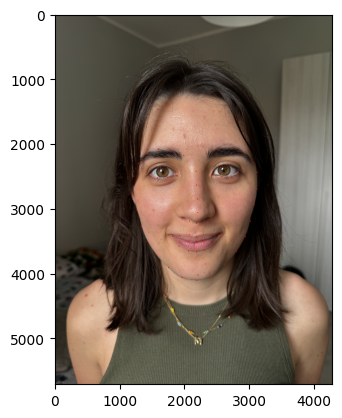

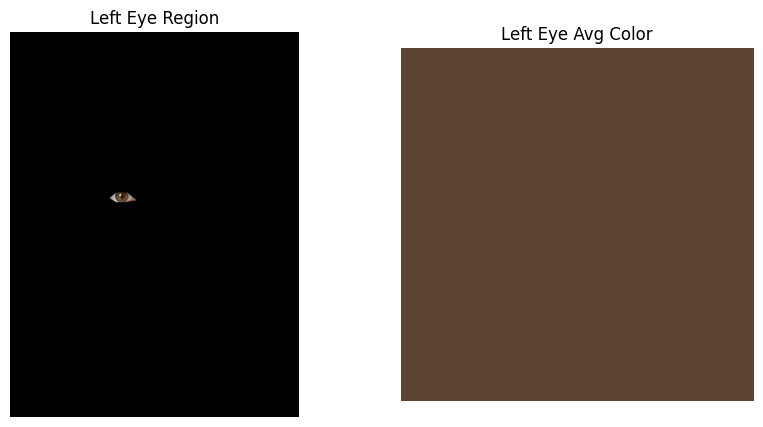

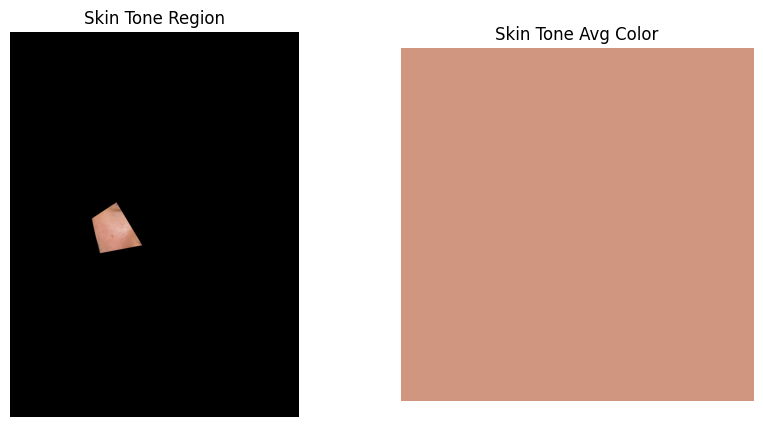

I0000 00:00:1718798040.415190  164566 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1718798040.429069  169200 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/opt/anaconda3/lib/python3.11/site-packages/mediapipe/tasks/python/vision/image_segmenter.py:158: UserWarning: MessageFactory class is deprecated. Please use GetMessageClass() instead of MessageFactory.GetPrototype. MessageFactory class will be removed after 2024.
  graph_config = self._runner.get_graph_config()


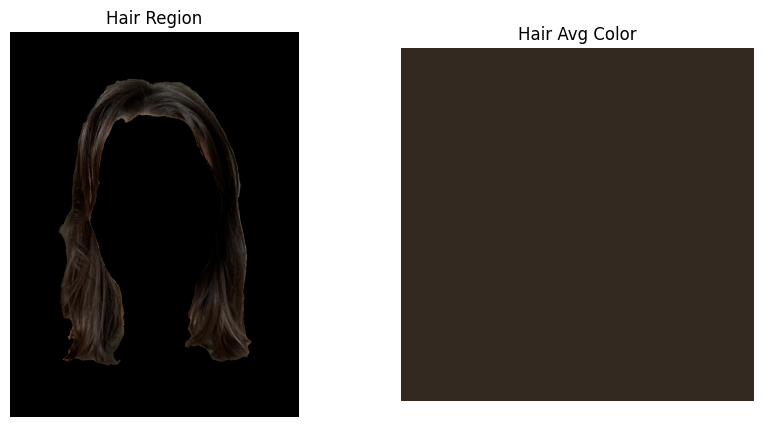

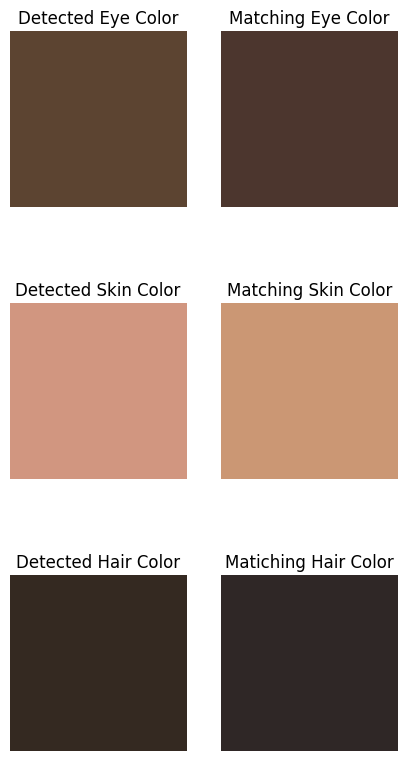


Your season is Dark Winter. Take a look at your wow colors!


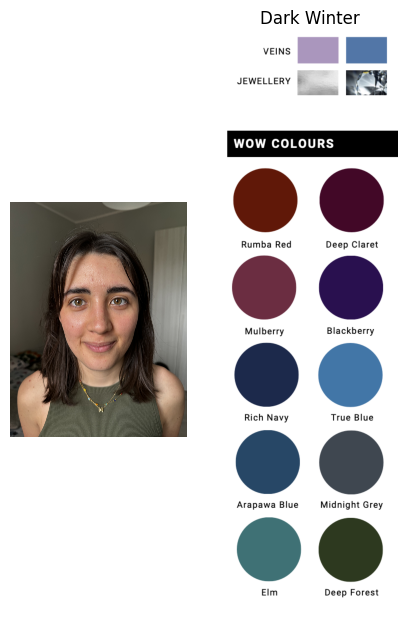

In [1]:
import math
import pandas as pd
import cv2
import numpy as np
import face_features_v3 as ff3
import skimage
import matplotlib.pyplot as plt
#The Match Score is the Sum of the Euclidean Distances of our Tuple and the closest Skin
#Hair and Eyes in every Season.
#Then we return the Min Match Score and with that the corresponding Season:
 


def lab_dist(rgb1, rgb2):
    """Compute the similarity coefficient between two RGB values using CIELAB color format."""
    sample= np.array([])
    if type(rgb1) != type(sample):
        rgb1=np.array(rgb1)
    if type(rgb2) != type(sample):
        rgb2= np.array(rgb2)
    lab1=skimage.color.rgb2lab([[[rgb1/255]]])[0][0][0]
    lab2=skimage.color.rgb2lab([[[rgb2/255]]])[0][0][0]
    delta_e = skimage.color.deltaE_ciede2000(lab1, lab2)
    return delta_e



#This gets three lists as an input and takes the most similar colour to my skin, hair and eye colour in each list, then
#returns the most similar colour and the distance

# Function to find the closest matches and compute the match score
def season_my_tuple(my_list, list_skin, list_hair, list_eyes):
    
    # Create dictionaries to store distances for skin, hair, and eyes
    dist_skin_dict = {}
    dist_hair_dict = {}
    dist_eyes_dict = {}
    
    # Calculate distances for skin
    for skin in list_skin:
        dist_skin = lab_dist(my_list[1], skin)
        dist_skin_dict[tuple(skin)] = dist_skin
    
    # Calculate distances for hair
    for hair in list_hair:
        dist_hair = lab_dist(my_list[2], hair)
        dist_hair_dict[tuple(hair)] = dist_hair
    
    # Calculate distances for eyes
    for eyes in list_eyes:
        dist_eyes = lab_dist(my_list[0], eyes)
        dist_eyes_dict[tuple(eyes)] = dist_eyes
    
    # Find the closest colors with minimum distance
    closest_skin = min(dist_skin_dict, key=dist_skin_dict.get)
    closest_hair = min(dist_hair_dict, key=dist_hair_dict.get)
    closest_eyes = min(dist_eyes_dict, key=dist_eyes_dict.get)
    
    # Get the minimum distances
    min_skin = dist_skin_dict[closest_skin]
    min_hair = dist_hair_dict[closest_hair]
    min_eyes = dist_eyes_dict[closest_eyes]
    
    # Calculate the total match score by summing the minima
    match_score = min_skin + min_hair + min_eyes
    
    return (closest_skin, closest_hair, closest_eyes, match_score)





def return_season(my_list):
    match_scores = {}
 #find match information for every seaso
    for season in df.index:
        skin = df.loc[season, 'Skin']
        hair = df.loc[season, 'Hair']
        eyes = df.loc[season, 'Eyes']    
        match_information=season_my_tuple(my_list, skin, hair, eyes)
        match_scores[season]=match_information
    #return season with closest colour, score, and a picture (print closest
    #where your colours get compared with colours found as closest to yours from season picked
    #so you can see how accurate a season fits your colours (maybe as paint in in a picture of a human?)
    # Find the season with the lowest match score
    min_season = None  # Start with None
    min_score = float('inf')  # Set initial minimum to infinity
    
    for season, info in match_scores.items():
        current_score = info[3]  # Match score is the 4th element
        
        if current_score < min_score:  # If current score is lower
            min_score = current_score  # Update minimum
            min_season = season  # Update best season    
    
    #in the end we see which match score of which season is the lowest and return that season with
    #a screenshot of information (which colours fit best etc) from document
    
    if min_season:
        closest_skin, closest_hair, closest_eyes, _ = match_scores[min_season]
        
        fig, axs = plt.subplots(3,2, figsize=(5,10))
        axs[0][0].imshow([[my_list[0]]])
        axs[0][0].set_title('Detected Eye Color')
        axs[0][1].imshow([[closest_eyes]])
        axs[0][1].set_title('Matching Eye Color')
        axs[1][0].imshow([[my_list[1]]])
        axs[1][0].set_title('Detected Skin Color')
        axs[1][1].imshow([[closest_skin]])
        axs[1][1].set_title('Matching Skin Color')
        axs[2][0].imshow([[my_list[2]]])
        axs[2][0].set_title('Detected Hair Color')
        axs[2][1].imshow([[closest_hair]])
        axs[2][1].set_title('Matiching Hair Color')
        for ax in axs.ravel():
            ax.set_axis_off()
        plt.show()

        wow_colors= np.array(df.loc[min_season, 'Wow'])
        
            
    return min_season, wow_colors




   
# Import the dataset 
df = pd.read_json('/Users/daniel/Desktop/Armochromia/final/Color_analysis.json')

# Input image
image_path= '/Users/daniel/Desktop/Armochromia/samples/mati.jpg'
my_img=cv2.imread(image_path)

# Get the original image with landmarks, and a collection of all the landmarks coordinates
landmarked_image, landmarks=ff3.landmark_extractor(my_img)

# Extract the average color for eyes, skin and hair from the input image
colours_oi=ff3.extract_colors(my_img, landmarked_image, landmarks, image_path)

# Perform the matching to the season
my_season, my_wow_colors = return_season(colours_oi) 

# Printing and Plotting the final result
print(f"\nYour season is {my_season}. Take a look at your wow colors!")
fig, axs = plt.subplots(1,2, figsize=(5,10))
axs[0].imshow(cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB))
axs[1].imshow(my_wow_colors)
axs[1].set_title(label=my_season)
for ax in axs.ravel():
    ax.set_axis_off()

plt.show()